## Hệ số hồi quy bị ảnh hưởng bới điều chuẩn

Như chúng ta đã đề cập, điều chuẩn áp dụng penalty đối với các hệ số để giảm ảnh hưởng của chúng và tạo ra các mô hình tổng quát hóa tốt hơn. Điều này cải thiện chất lượng mô hình khá tốt. Tuy nhiên, nó che giấu mối quan hệ thực sự giữa yếu tố dự đoán X và kết quả Y. Hãy cùng khám phá lý do tại sao.

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [9]:
# load tập dữ liệu
data = pd.read_csv('lab6-13_dataset/house-price/houseprice.csv')
data = data[data.columns[data.dtypes != 'object']]
data = data.dropna()
data.shape

(1121, 38)

In [10]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
# chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((784, 37), (337, 37))

Hãy khớp một vài mô hình hồi quy logistic với các giá trị cho penalty của điều chuẩn.

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

# huấn luyện 4 mô hình khác nhau, giảm lượng
# điều chuẩn (là tăng C)

# ở đây chúng ta sẽ lưu trữ các hệ số của biến
# khớp cho từng mô hình khác nhau
coefs_df = []

## Yêu cầu 1
# huấn luyện 5 mô hình khác nhau với điều chuẩn
penalties = [0.005, 0.05, 0.5, 5, 50]

for c in penalties:   
    ## VIẾT CODE Ở ĐÂY:
    logit = Ridge(alpha=c, random_state=10, max_iter=300, normalize=True)
    logit.fit(scaler.transform(X_train), y_train)
    
    # lưu trữ các hệ số của biến của biến trong một list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

/Users/ngohongthai/Documents/projects/tensorflow-env/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/ngohongthai/Documents/projects/tensorflow-env/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Stan

<details><summary> Gợi ý </summary>

[LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

</details>

In [13]:
## Yêu cầu 2
# bây giờ tạo một dataframe với các hệ số cho tất cả
# các biến cho 4 mô hình hồi quy logistic khác nhau

## VIẾT CODE Ở ĐÂY:
coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head()

,0.005,0.050,0.500,5.000,50.000
Id,231.074716,24.663053,-650.910893,-560.254068,-111.413749
MSSubClass,-5397.199440,-4727.472538,-2436.885182,-819.635747,-143.270811
LotFrontage,3487.956407,3542.945590,3599.356247,2632.960741,588.395536
LotArea,2438.375785,2701.093451,3532.069872,2681.252549,588.720022
OverallQual,22439.229135,20932.661076,14121.251568,6078.266500,1197.861148


<details><summary> Gợi ý </summary>

[concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

</details>

In [14]:
# áp dụng thang đo log cho penalties (đơn giản hóa so sánh)

coefs.columns = np.log(penalties)
coefs.head()

,-5.298317,-2.995732,-0.693147,1.609438,3.912023
Id,231.074716,24.663053,-650.910893,-560.254068,-111.413749
MSSubClass,-5397.199440,-4727.472538,-2436.885182,-819.635747,-143.270811
LotFrontage,3487.956407,3542.945590,3599.356247,2632.960741,588.395536
LotArea,2438.375785,2701.093451,3532.069872,2681.252549,588.720022
OverallQual,22439.229135,20932.661076,14121.251568,6078.266500,1197.861148


Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

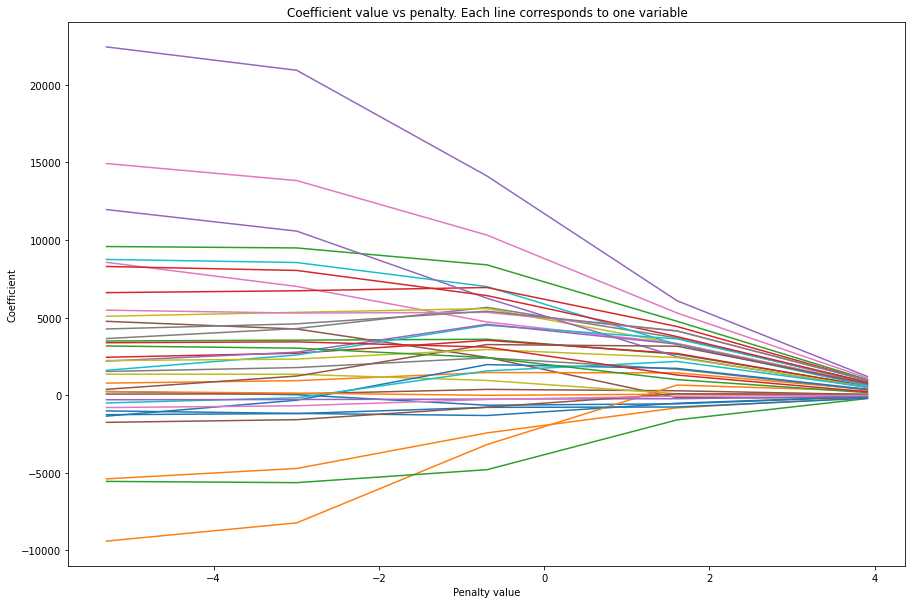

In [15]:
## Yêu cầu 3
# vẽ biểu đồ thay đổi của các hệ số với penalty
## VIẾT CODE Ở ĐÂY:
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

Text(0.5, 1.0, 'Coefficient value vs penalty')

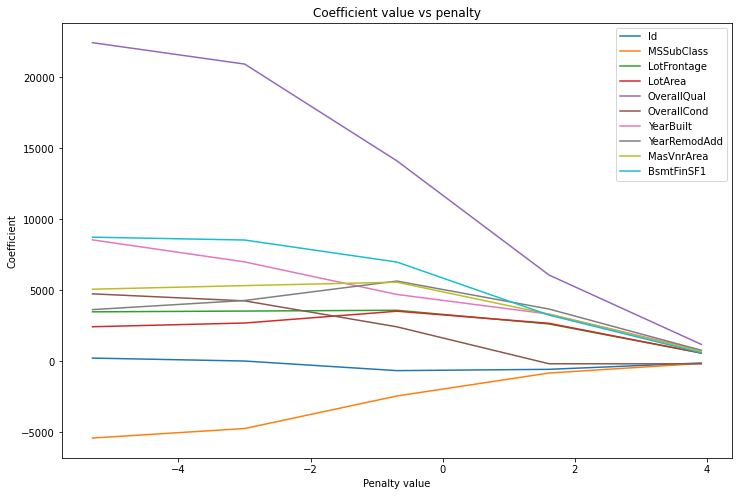

In [16]:
## Yêu cầu 4
# vẽ biểu đồ chỉ có 10 đặc trưng để
# hiển thị tốt hơn

temp = coefs.head(10)
temp = temp.T
## VIẾT CODE Ở ĐÂY:
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Chúng ta có thể thấy mối quan hệ phức tạp giữa các hệ số. Một số đặc trưng hiển thị hệ số lớn hơn những đặc trưng khác mà không cần điều chuẩn, nhưng khi penalty tăng thì mối quan hệ này lại thay đổi.

Một số đặc trưng khác rất quan trọng (hiển thị các hệ số lớn) mà không cần điều chuẩn, nhưng có điều chuẩn thì chúng cũng có mức độ quan trọng giống các đặc trưng khác.

Mặc dù điều này không quan trọng đối với việc lựa chọn đặc trưng nhưng lại khá quan trọng nếu mục đích của chúng ta là hiểu mối quan hệ thực sự của biến với mục tiêu, hay nói cách khác là khi chúng ta cần diễn giải và hiểu đầy đủ về kết quả của Hồi quy tuyến tính. 

Text(0.5, 1.0, 'Coefficient value vs penalty')

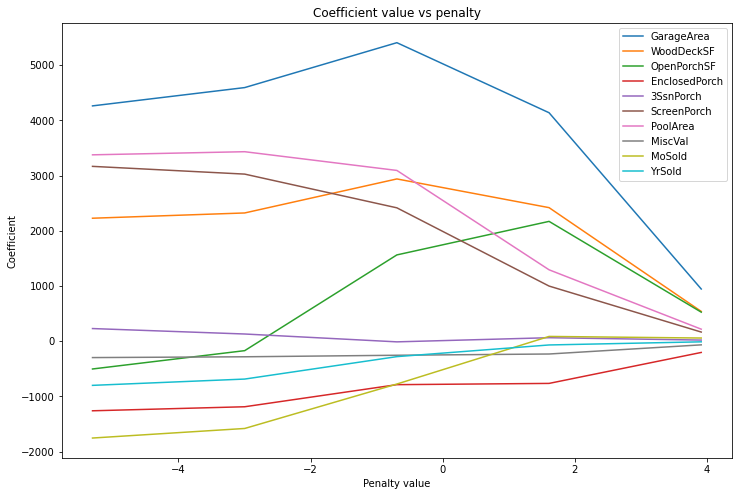

In [18]:
## Yêu cầu 5
# vẽ biểu đồ có 10 đặc trưng khác để hiển thị
temp = coefs.tail(10)
## VIẾT CODE Ở ĐÂY:
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Tương tự như trước, mối quan hệ giữa các đặc trưng khi được suy ra từ các hệ số thay đổi phụ thuộc vào mức độ điều chuẩn.